# Credit card  fraud detection model
### (with a sampled dataset)

## Import Packages 

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from pandas_profiling import profile_report

## Loading the datasets 

In [2]:
df = pd.read_csv('data\sampled_creditcard.csv')

In [3]:
df

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,141586,84408.0,1.236872,0.173462,0.091866,0.575646,-0.160457,-0.437177,-0.113057,0.053734,...,-0.302943,-0.920227,0.134489,-0.372612,0.134075,0.152068,-0.018139,0.020168,1.98,0
1,35312,38060.0,1.410675,-0.920579,0.130568,-1.386908,-1.275017,-1.068582,-0.533475,-0.262086,...,-0.438262,-1.038190,0.151219,0.478830,0.235559,-0.517125,-0.003101,0.016364,52.93,0
2,131258,79536.0,-1.333894,1.325309,1.691594,-0.018299,-0.444247,-0.446008,0.471467,0.416722,...,-0.182823,-0.615566,0.025398,0.398609,0.031015,0.080103,0.032653,0.058260,45.32,0
3,142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1
4,100610,67567.0,-4.007796,-2.788996,1.716717,0.302774,0.934092,-1.805187,-1.570535,0.606917,...,-0.222625,-0.773374,-1.211700,0.576271,-0.060400,0.827289,0.555501,-0.806061,70.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,87378,61658.0,1.049432,0.242404,0.602180,2.476252,-0.155320,0.146696,-0.009959,0.131740,...,-0.175560,-0.643606,-0.028099,-0.046054,0.380245,-0.148323,-0.020690,0.018321,56.84,0
2488,59560,48894.0,1.125445,-0.241987,0.716803,0.260720,-0.431560,0.534352,-0.648685,0.304039,...,0.046010,0.075277,-0.029465,-0.635874,0.122821,0.443718,-0.001803,0.010776,35.89,0
2489,250012,154680.0,1.973810,0.313115,-2.441206,1.495365,0.891927,-0.921381,0.608826,-0.248049,...,-0.044372,-0.068157,-0.015870,0.439214,0.432732,-0.513379,-0.017507,-0.020929,40.46,0
2490,256372,157659.0,-0.399495,1.036782,0.095845,-0.919341,1.532622,-0.123532,1.034945,0.012567,...,-0.264700,-0.788094,-0.189154,0.015189,-0.116857,0.174763,0.053916,0.140704,1.29,0


In [4]:
df.columns

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')

## Data Preprocessing and EDA

In [5]:
# dropping the unnamed column as it is not needed.......
df.drop('Unnamed: 0', axis="columns", inplace=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,84408.0,1.236872,0.173462,0.091866,0.575646,-0.160457,-0.437177,-0.113057,0.053734,0.309157,...,-0.302943,-0.920227,0.134489,-0.372612,0.134075,0.152068,-0.018139,0.020168,1.98,0
1,38060.0,1.410675,-0.920579,0.130568,-1.386908,-1.275017,-1.068582,-0.533475,-0.262086,-2.485292,...,-0.438262,-1.038190,0.151219,0.478830,0.235559,-0.517125,-0.003101,0.016364,52.93,0
2,79536.0,-1.333894,1.325309,1.691594,-0.018299,-0.444247,-0.446008,0.471467,0.416722,-0.756810,...,-0.182823,-0.615566,0.025398,0.398609,0.031015,0.080103,0.032653,0.058260,45.32,0
3,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1
4,67567.0,-4.007796,-2.788996,1.716717,0.302774,0.934092,-1.805187,-1.570535,0.606917,0.824969,...,-0.222625,-0.773374,-1.211700,0.576271,-0.060400,0.827289,0.555501,-0.806061,70.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,61658.0,1.049432,0.242404,0.602180,2.476252,-0.155320,0.146696,-0.009959,0.131740,-0.615280,...,-0.175560,-0.643606,-0.028099,-0.046054,0.380245,-0.148323,-0.020690,0.018321,56.84,0
2488,48894.0,1.125445,-0.241987,0.716803,0.260720,-0.431560,0.534352,-0.648685,0.304039,0.307888,...,0.046010,0.075277,-0.029465,-0.635874,0.122821,0.443718,-0.001803,0.010776,35.89,0
2489,154680.0,1.973810,0.313115,-2.441206,1.495365,0.891927,-0.921381,0.608826,-0.248049,0.360644,...,-0.044372,-0.068157,-0.015870,0.439214,0.432732,-0.513379,-0.017507,-0.020929,40.46,0
2490,157659.0,-0.399495,1.036782,0.095845,-0.919341,1.532622,-0.123532,1.034945,0.012567,-0.777497,...,-0.264700,-0.788094,-0.189154,0.015189,-0.116857,0.174763,0.053916,0.140704,1.29,0


In [6]:
# getting the number of the fraudlent transaction and Valid transaction.....
fraud = df[df['Class']==1]
normal = df[df['Class'] == 0]
fraction = len(fraud)/float(len(normal))

print ('Fraudlent Transactions: {}'.format(len(fraud)))
print ('Non-Fraudlent Transactions: {}'.format(len(normal)))
print ('Fraction of the variable: {}'.format(fraction))

Fraudlent Transactions: 492
Non-Fraudlent Transactions: 2000
Fraction of the variable: 0.246


In [8]:
# Visualizing the data....
sns.countplot(x = "Class", data=df, saturation=1.5, palette='twilight_shifted_r')

<AxesSubplot:xlabel='Class', ylabel='count'>

In [9]:
plt.figure(figsize=[12,10])
sns.scatterplot(x='Time', y='Amount', data=df, hue="Class", palette='gist_earth')
plt.show()

C:\Users\KINEPI~1\AppData\Local\Temp/ipykernel_9892/1614172671.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [10]:
max_amount = df[["Amount"]]
max_amount.describe()

,Amount
count,2492.000000
mean,96.630177
std,235.767939
min,0.000000
25%,3.895000
50%,20.765000
75%,88.057500
max,4000.000000


C:\Users\KINE PI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


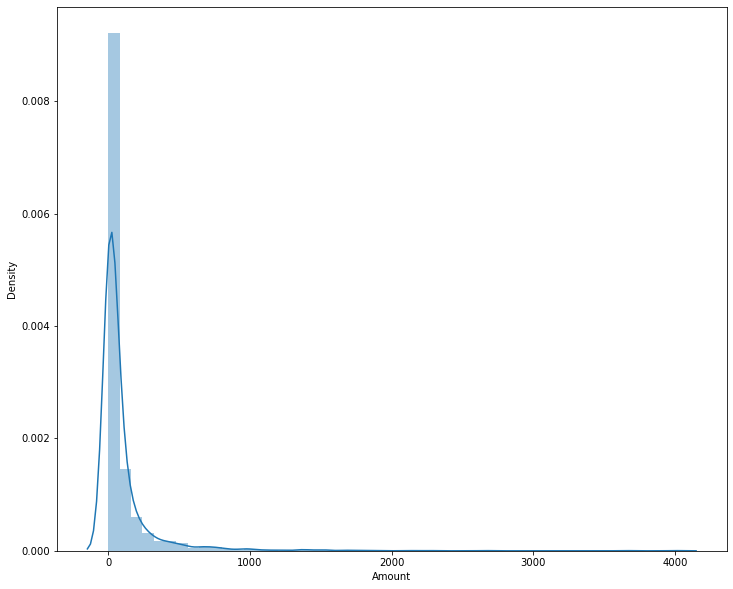

In [23]:
# 
plt.figure(figsize=[12,10])
sns.distplot(df["Amount"])
plt.show()

In [30]:
max_time = df[['Time']]
max_time.describe()

,Time
count,2492.000000
mean,92918.915329
std,48577.835527
min,406.000000
25%,51191.750000
50%,84208.000000
75%,139084.500000
max,172768.000000


C:\Users\KINE PI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KINE PI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


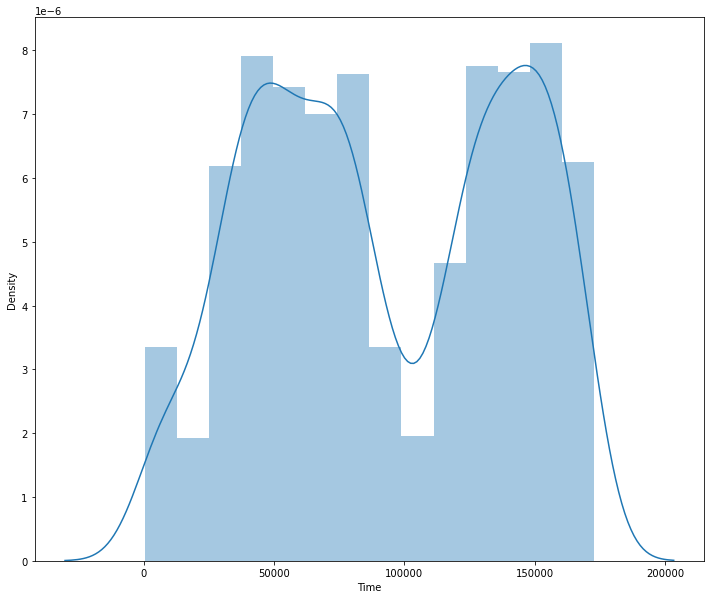

In [32]:
plt.figure(figsize=[12,10])
sns.distplot(df["Time"])
plt.show()

<Figure size 864x720 with 0 Axes>

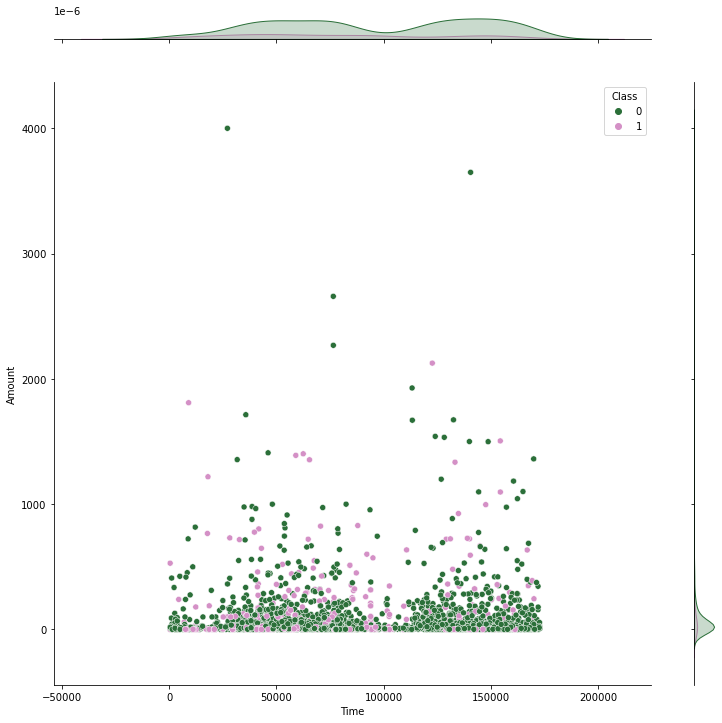

In [60]:
plt.figure(figsize=[12,10])
sns.jointplot(x='Time', y='Amount', data=df, hue="Class", height=10, ratio=10, space=2, palette= 'cubehelix')
plt.show()

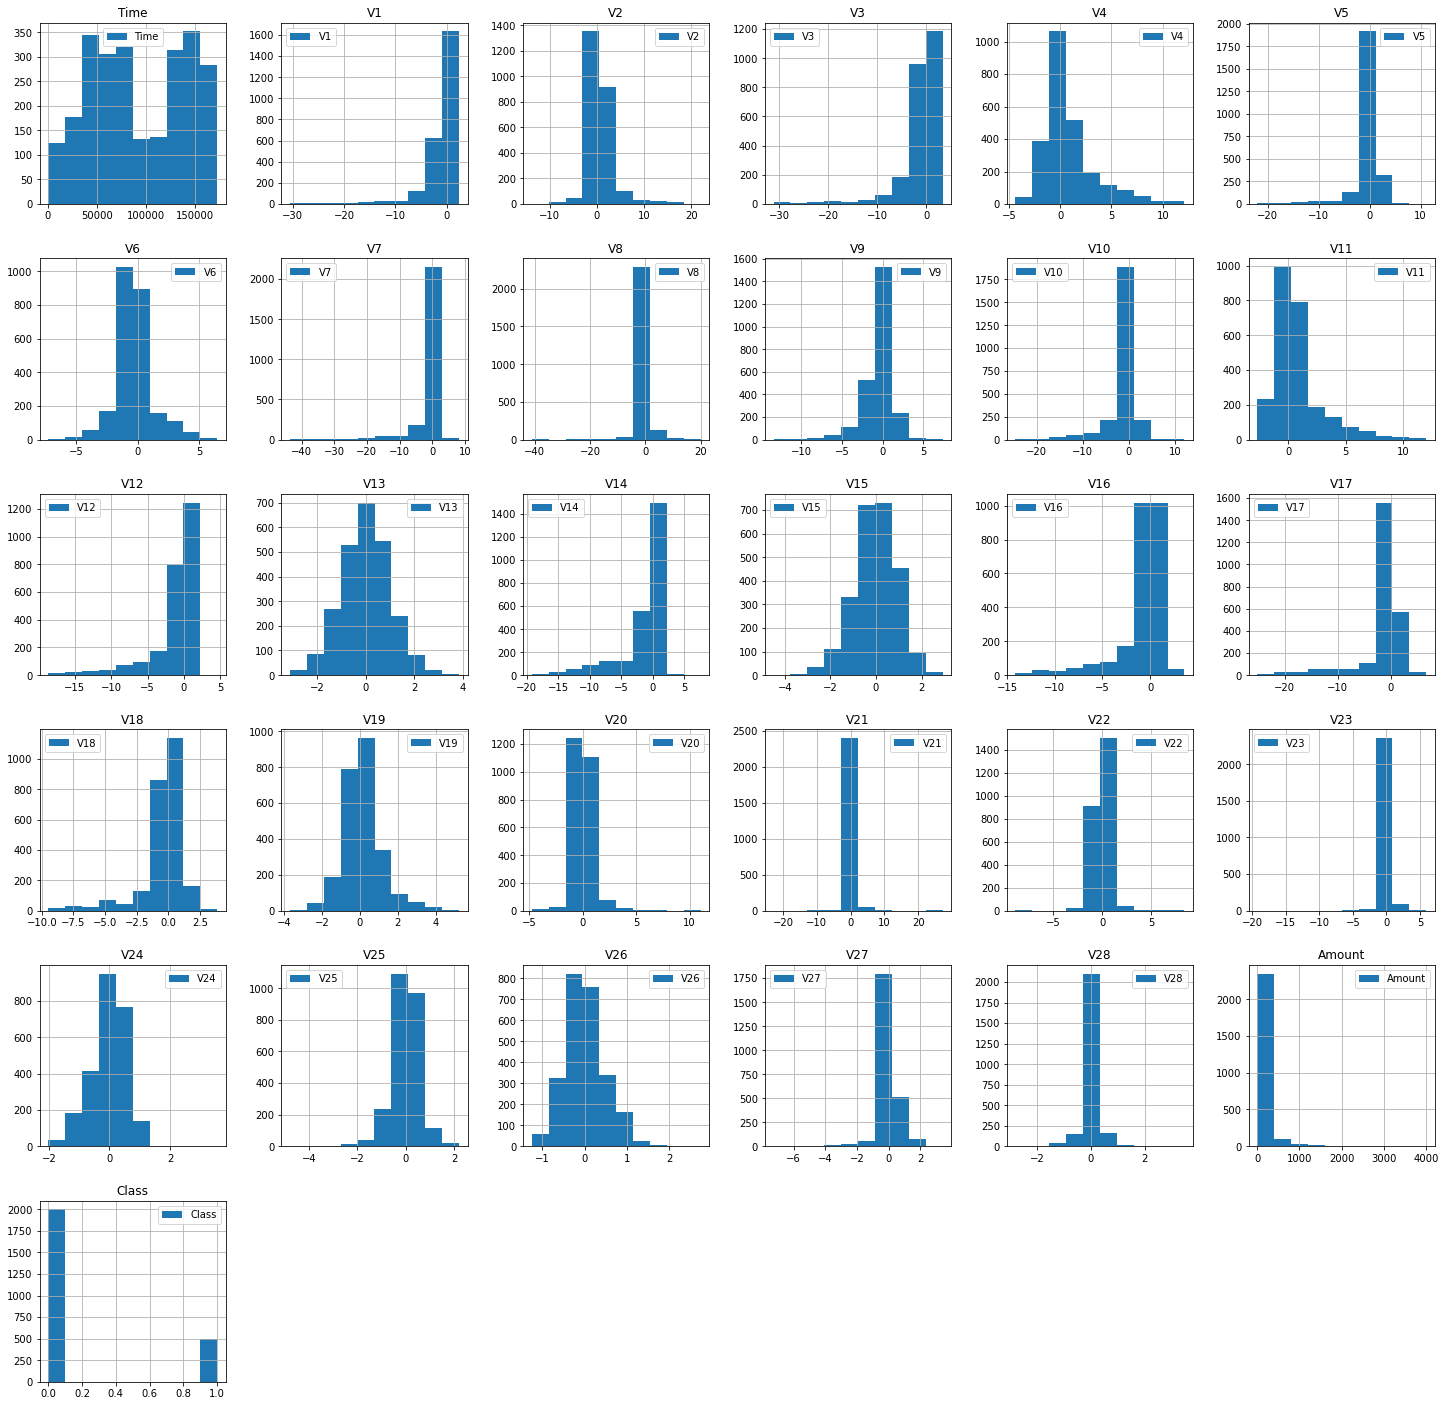

In [37]:
df.hist(figsize=(25, 25), legend=True)
plt.show()

# Balancing the Dateset

In [11]:
X = df.iloc[:, :-1]
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [12]:
Y = df.iloc[:, -1]
Y.shape

(2492,)

In [13]:
oversample = SMOTE(random_state=101)
oversample

SMOTE(random_state=101)

In [14]:
x_res, y_res = oversample.fit_resample(X, Y)

In [15]:
print ('####### NEW SHAPE #######')
print ('{}'.format(x_res.shape))
print ('{}'.format(y_res.shape))

####### NEW SHAPE #######
(4000, 30)
(4000,)


In [16]:
names = df.columns.to_list()
names

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [17]:
# new_df = pd.concat([x_res, y_res], axis=1)
# new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,84408.0,1.236872,0.173462,0.091866,0.575646,-0.160457,-0.437177,-0.113057,0.053734,0.309157,...,-0.302943,-0.920227,0.134489,-0.372612,0.134075,0.152068,-0.018139,0.020168,1.98,0
1,38060.0,1.410675,-0.920579,0.130568,-1.386908,-1.275017,-1.068582,-0.533475,-0.262086,-2.485292,...,-0.438262,-1.038190,0.151219,0.478830,0.235559,-0.517125,-0.003101,0.016364,52.93,0
2,79536.0,-1.333894,1.325309,1.691594,-0.018299,-0.444247,-0.446008,0.471467,0.416722,-0.756810,...,-0.182823,-0.615566,0.025398,0.398609,0.031015,0.080103,0.032653,0.058260,45.32,0
3,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1
4,67567.0,-4.007796,-2.788996,1.716717,0.302774,0.934092,-1.805187,-1.570535,0.606917,0.824969,...,-0.222625,-0.773374,-1.211700,0.576271,-0.060400,0.827289,0.555501,-0.806061,70.00,0


In [18]:
from sklearn.utils import shuffle
new_df = shuffle(new_df)

In [19]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
864,46251.0,-2.679606,0.609764,0.139181,0.357102,-1.011745,-0.067408,-0.653811,1.289505,0.029670,...,0.170427,0.417966,-0.521407,-0.327609,0.057884,0.488402,0.111225,-0.165817,99.99,0
1271,140600.0,2.003574,-0.485826,-0.444272,-0.000593,-0.130305,0.922564,-0.992101,0.329673,1.290956,...,0.055535,0.333419,0.172661,-0.357094,-0.256852,-0.399703,0.055473,-0.040039,1.18,0
2630,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
949,134895.0,2.103468,-0.186385,-1.706561,0.012612,0.389979,-0.421996,-0.004910,-0.101587,0.640451,...,0.225409,0.730668,-0.130593,-1.094189,0.325684,-0.050060,-0.029509,-0.081416,1.00,0
575,162623.0,-2.022447,2.583857,-2.480486,-1.021685,-0.432377,-2.086988,0.168279,1.303290,-0.316008,...,0.312079,0.718420,0.015467,0.050883,-0.102664,0.113162,0.201132,0.197268,0.77,0


In [115]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3817,84795.563458,-1.500766,-0.740022,0.979480,0.452728,-0.345662,-0.082175,1.230110,0.240467,-0.601648,...,0.333895,0.007847,0.835448,0.108950,0.159511,-0.597011,-0.096926,0.029897,352.988064,1
387,127375.000000,-1.724320,-1.794989,-2.180706,-0.166086,-2.261179,-0.042119,2.530511,-0.549159,-0.811844,...,-0.504287,-0.393628,0.030564,0.034899,-2.164061,-0.795750,0.689070,-0.178918,693.240000,0
1991,43402.000000,-2.557315,-0.811564,1.431029,-1.511885,-0.268636,0.228923,-0.758615,0.696498,-1.054965,...,0.344560,0.818984,-0.582439,-0.214771,0.247887,-0.289287,-0.950376,-0.446916,20.000000,0
3135,154303.948413,-5.311202,-4.038810,-4.952838,4.307233,4.806713,-5.160875,-4.325077,1.227495,-1.594961,...,0.914315,-0.823501,-0.216402,-0.645674,-0.110905,0.302516,0.638684,-0.764296,24.293195,1
1720,125757.000000,1.530408,-0.183606,-0.123362,4.027021,-0.256551,0.253994,-0.004374,0.058593,-0.394755,...,-0.311926,-1.248673,0.347454,-0.194287,-0.644272,-0.519180,-0.031503,-0.000489,180.000000,0


In [20]:
new_df.shape

(4000, 31)

In [21]:
# getting the number of the fraudlent transaction and Valid transaction.....after balancing the data
fraud = new_df[new_df['Class']==1]
normal = new_df[new_df['Class'] == 0]
fraction = len(fraud)/float(len(normal))

print ('Fraudlent Transactions: {}'.format(len(fraud)))
print ('Non-Fraudlent Transactions: {}'.format(len(normal)))
print ('Fraction of the variable: {}'.format(fraction))

Fraudlent Transactions: 2000
Non-Fraudlent Transactions: 2000
Fraction of the variable: 1.0


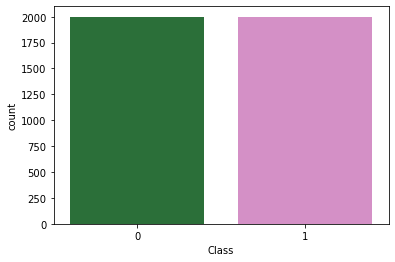

In [96]:
# Visualizing the data....after balncing the data
sns.countplot(x = "Class", data=new_df, saturation=1.5, palette='cubehelix')
plt.show()

<Figure size 864x720 with 0 Axes>

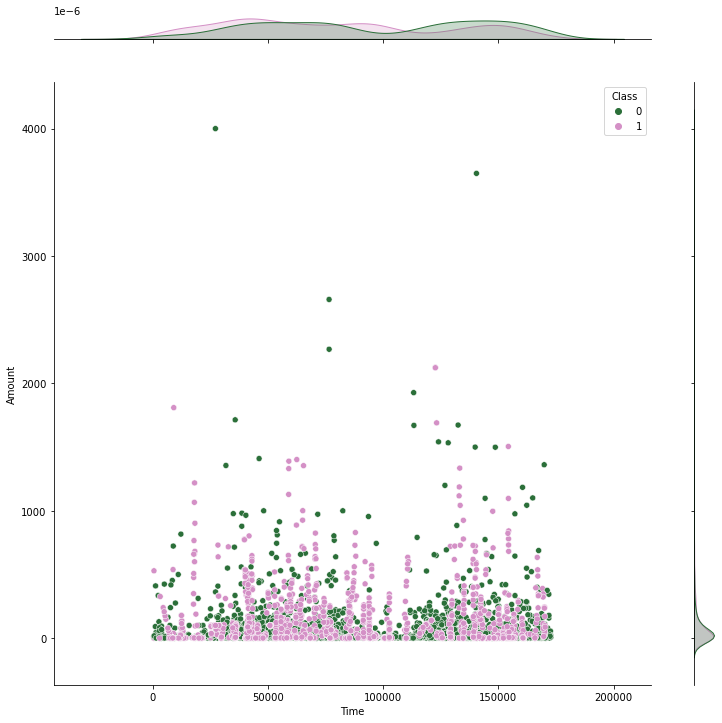

In [93]:
plt.figure(figsize=[12,10])
sns.jointplot(x='Time', y='Amount', data=new_df, hue="Class", height=10, ratio=10, space=2, palette= 'cubehelix')
plt.show()

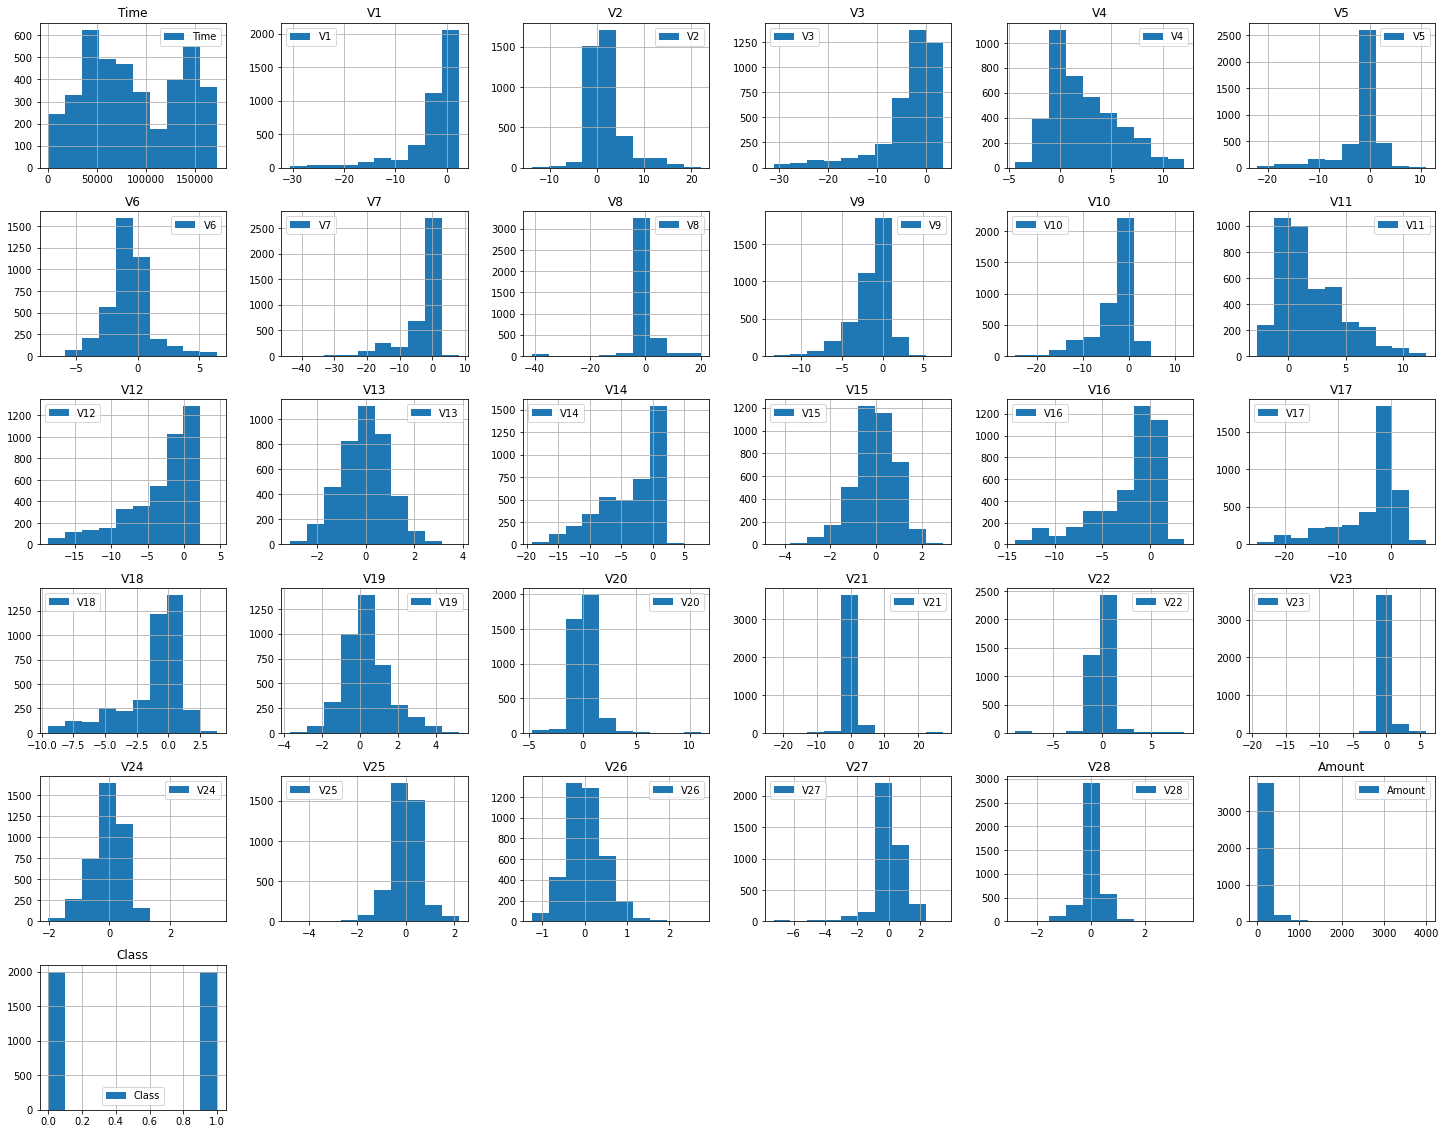

In [120]:
new_df.hist(figsize=(25,20), legend=True)
plt.show()

In [44]:
new_df.to_csv('data\BalancedCreditCardDataset.csv')

In [45]:
new_df.shape

(4000, 31)

# Model Building

In [91]:
names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
         'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [88]:
# separating the feature from the target variable.......by slicing the dataset
x = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1]
X = np.array([new_df.iloc[4, :-1]])
X = X.astype(float)
print (X.shape)

(1, 30)


In [96]:
data = pd.DataFrame(X, columns=names)
data.shape

(1, 30)

# Importing the Model Algorithms, train_test split and Model Validation

In [24]:
# train test split
from sklearn.model_selection import train_test_split
# accuracy score, f1 score, classification report and confusion matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error


In [30]:
# spliting into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=101)
X_train.shape, X_test.shape

((2800, 30), (1200, 30))

## K Nearest neighbor

In [78]:
# importing knn
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier(n_neighbors=10)
knn

KNeighborsClassifier(n_neighbors=10)

In [95]:
# Training and predicting the data using K Nearest Neighbor
knn.fit(X_train, y_train)
ypred_knn = knn.predict(data)
ypred_knn

array([0], dtype=int64)

In [146]:
print('\t##########CLASSIFICATION REPORT########## \n{}'.format(classification_report(y_test, ypred_knn)))

	##########CLASSIFICATION REPORT########## 
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       596
           1       0.77      0.75      0.76       604

    accuracy                           0.76      1200
   macro avg       0.76      0.76      0.76      1200
weighted avg       0.76      0.76      0.76      1200



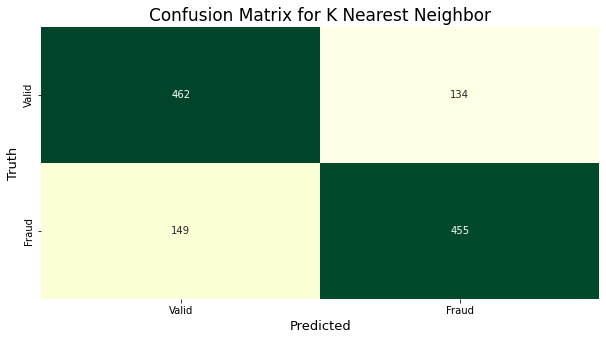

In [148]:
# confusion matrix
cm = confusion_matrix(y_test, ypred_knn)
label = [ 'Valid', 'Fraud']
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='YlGn')
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Truth', fontsize=13)
plt.xticks([0.5, 1.5], label)
plt.yticks([0.5, 1.5], label)
plt.title('Confusion Matrix for K Nearest Neighbor', fontsize=17)
plt.show()

### HyperParameter tuning for KNN

In [31]:
from sklearn.model_selection import GridSearchCV # using the GridSearchCV

knn_param = KNeighborsClassifier()
knn_params = {"n_neighbors": list(range(2, 10, 1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(knn_param, param_grid=knn_params)
grid_knn.fit(X_train, y_train)
print  ('Best Parameters: {}'.format(grid_knn.best_params_))
print('Best Accuracy Score: {:.2f}% accuracy score'.format(grid_knn.best_score_ * 100))
print('Best Estimator: {} \nBest Index: {}'.format(grid_knn.best_estimator_, grid_knn.best_index_))

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3}
Best Accuracy Score: 77.75% accuracy score
Best Estimator: KNeighborsClassifier(n_neighbors=3) 
Best Index: 1


## Decision Tree

In [25]:
# importing decision tree
from sklearn.tree import DecisionTreeClassifier

### Hyperparameter Tuning for Decision Tree

In [32]:
dtree_param = DecisionTreeClassifier()
tree_parameters = {'criterion': ['gini', 'entropy'], 'splitter' : ["best", "random"], 'max_depth': list(range(2, 6, 1)),
                   'min_samples_leaf': list(range(5, 10, 1)), 'ccp_alpha' :[0.0, 0.1, 0.2, 0.3, 0.4] }
grid_tree = GridSearchCV(dtree_param, tree_parameters)
grid_tree.fit(X_train, y_train)
ypred_gtree = grid_tree.predict(X_test)


print  ('Best Parameters: {}'.format(grid_tree.best_params_))
print('Best Accuracy Score: {:.2f}% accuracy score'.format(grid_tree.best_score_ * 100))
print('Best Estimator: {} \nBest Index: {}'.format(grid_tree.best_estimator_, grid_tree.best_index_))
print('\n\t##########CLASSIFICATION REPORT########## \n{}'.format(classification_report(y_test, ypred_gtree)))

# confusion matrix
cm = confusion_matrix(y_test, ypred_gtree)
label = [ 'Valid', 'Fraud']
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Truth', fontsize=13)
plt.xticks([0.5, 1.5], label)
plt.yticks([0.5, 1.5], label)
plt.title('Confusion Matrix for Decision Tree Hyperparameter tuning', fontsize=17)
plt.show()

Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 7, 'splitter': 'best'}
Best Accuracy Score: 95.50% accuracy score
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7) 
Best Index: 74

	##########CLASSIFICATION REPORT########## 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       623
           1       0.97      0.94      0.96       577

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



C:\Users\KINEPI~1\AppData\Local\Temp/ipykernel_9892/415579597.py:24: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [35]:
dtree_2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
dtree_2

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [82]:
dtree_2.fit(x,y.values)
ypred_dtree_2 = dtree_2.predict(X)
ypred_dtree_2[0]

c:\users\kine pi\desktop\credit_card\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

In [73]:
error = mean_absolute_error(y.values, ypred_dtree_2)
print ("The error is: {}".format(error))

ValueError: Found input variables with inconsistent numbers of samples: [4000, 1]

In [165]:
# using the decision tree model
dtree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
dtree

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [168]:
dtree.fit(X_train, y_train)
ypred_dtree = dtree.predict(X_test)
ypred_dtree

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

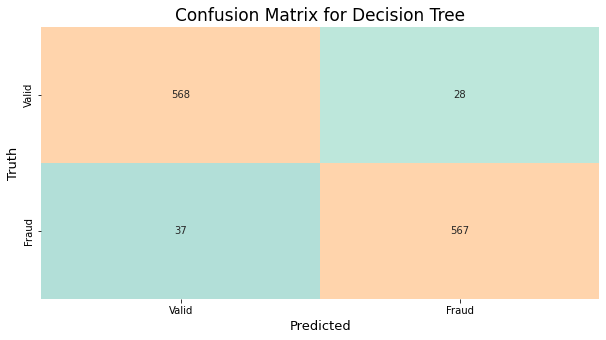

In [172]:
# confusion Matrix
cm = confusion_matrix(y_test, ypred_dtree)
label = ['Valid', 'Fraud']
plt.figure(figsize=[10,5])
sns.heatmap(cm,  annot=True, cbar=False, fmt='d', cmap='icefire')
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Truth', fontsize=13)
plt.xticks([0.5, 1.5], label)
plt.yticks([0.5, 1.5], label)
plt.title('Confusion Matrix for Decision Tree', fontsize=17)
plt.show()

In [174]:
print('\t##########CLASSIFICATION REPORT########## \n{}'.format(classification_report(y_test, ypred_dtree)))

	##########CLASSIFICATION REPORT########## 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       596
           1       0.95      0.94      0.95       604

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



## Random Forest Classifier

In [175]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
rf = RandomForestClassifier(n_estimators= 150, min_samples_split=5, min_samples_leaf=5)
rf

RandomForestClassifier(min_samples_leaf=5, min_samples_split=5,
                       n_estimators=150)

In [188]:
rf.fit(X_train, y_train)
ypred_rf =rf.predict(X_test)
ypred_rf

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)


	##########CLASSIFICATION REPORT########## 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       596
           1       0.99      0.96      0.97       604

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



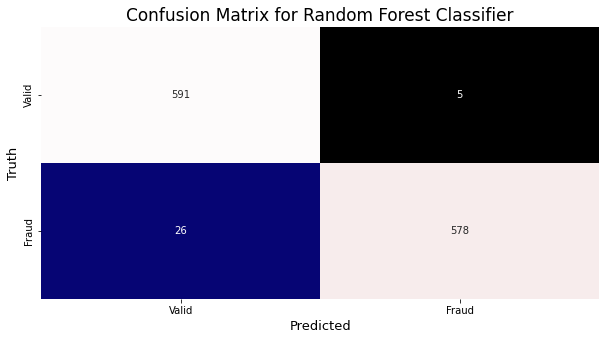

In [226]:


print('\n\t##########CLASSIFICATION REPORT########## \n{}'.format(classification_report(y_test, ypred_rf)))

# confusion matrix
cm = confusion_matrix(y_test, ypred_rf)
label = [ 'Valid', 'Fraud']
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='gist_earth')
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Truth', fontsize=13)
plt.xticks([0.5, 1.5], label)
plt.yticks([0.5, 1.5], label)
plt.title('Confusion Matrix for Random Forest Classifier', fontsize=17)
plt.show()

## Support vector Machine

In [192]:
from sklearn.svm import SVC

### HyperparameterTuning for Support Vector Machine

[1 0 0 ... 1 0 1]
Best Parameters: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Accuracy Score: 78.18% accuracy score
Best Estimator: SVC(C=100, gamma=0.0001) 
Best Index: 13

	##########CLASSIFICATION REPORT########## 
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       596
           1       0.82      0.77      0.79       604

    accuracy                           0.80      1200
   macro avg       0.80      0.80      0.80      1200
weighted avg       0.80      0.80      0.80      1200



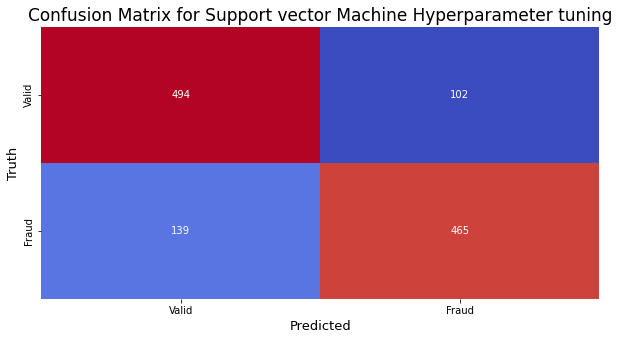

In [223]:
svc_param = SVC()
parameters = {
    "kernel" : ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.1, 1, 0.01, 0.0001, 0.001]
}

grid_svc = GridSearchCV(svc_param, parameters)
grid_svc.fit(X_train, y_train)
ypred_gsvc = grid_svc.predict(X_test)
print (ypred_gsvc)

print  ('Best Parameters: {}'.format(grid_svc.best_params_))
print('Best Accuracy Score: {:.2f}% accuracy score'.format(grid_svc.best_score_ * 100))
print('Best Estimator: {} \nBest Index: {}'.format(grid_svc.best_estimator_, grid_svc.best_index_))
print('\n\t##########CLASSIFICATION REPORT########## \n{}'.format(classification_report(y_test, ypred_gsvc)))

# confusion matrix
cm = confusion_matrix(y_test, ypred_gsvc)
label = [ 'Valid', 'Fraud']
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Truth', fontsize=13)
plt.xticks([0.5, 1.5], label)
plt.yticks([0.5, 1.5], label)
plt.title('Confusion Matrix for Support vector Machine Hyperparameter tuning', fontsize=17)
plt.show()

## Extreme Gradient Boosting (XGBoost)

In [67]:
from xgboost import XGBClassifier

ImportError: cannot import name 'XGBClassifier' from 'xgboost' (unknown location)

In [216]:
xgb = x=XGBClassifier(objective='binary:logistic', use_label_encoder=True, n_estimators=100, n_jobs=5)
xgb

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=5, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [217]:
xgb.fit(X_train, y_train)
ypred_xgb = xgb.predict(X_test)
ypred_xgb

[04:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 0, 0, ..., 1, 0, 1], dtype=int64)


	##########CLASSIFICATION REPORT########## 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       596
           1       0.98      0.99      0.98       604

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



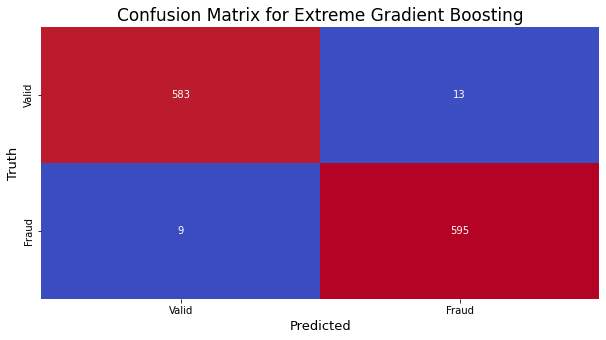

In [218]:
# Classification Report
print('\n\t##########CLASSIFICATION REPORT########## \n{}'.format(classification_report(y_test, ypred_xgb)))

# confusion matrix
cm = confusion_matrix(y_test, ypred_xgb)
label = [ 'Valid', 'Fraud']
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Truth', fontsize=13)
plt.xticks([0.5, 1.5], label)
plt.yticks([0.5, 1.5], label)
plt.title('Confusion Matrix for Extreme Gradient Boosting', fontsize=17)
plt.show()

## ROC Curve and ROC auc Score

In [221]:
from sklearn.metrics import roc_auc_score, roc_curve

In [227]:
knn_fpr, knn_tpr, rf_threshold = roc_curve(y_test, ypred_knn)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, ypred_gsvc)
dtree_fpr, dtree_tpr, dtree_threshold = roc_curve(y_test, ypred_dtree)
xg_fpr, xg_tpr, xg_threshold = roc_curve(y_test, ypred_xgb)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, ypred_rf)


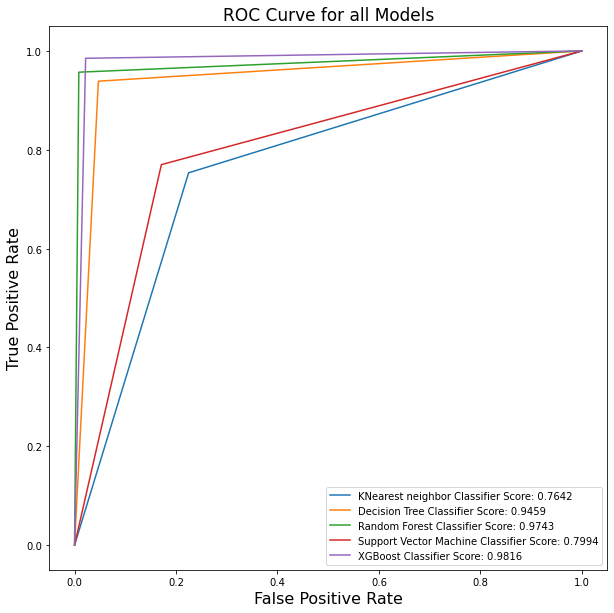

In [229]:
# ROC Curve

plt.figure(figsize=[10,10])
plt.title("ROC Curve for all Models", fontsize=17)
plt.plot(knn_fpr, knn_tpr, label='KNearest neighbor Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ypred_knn)))
plt.plot(dtree_fpr, dtree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ypred_dtree)))
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ypred_rf)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Machine Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ypred_gsvc)))
plt.plot(xg_fpr, xg_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ypred_xgb)))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()

